Stratégie avancée de nettoyage

    Normalisation des noms : homogénéiser les noms (ex : enlever majuscules/minuscules, "BOSS" en suffixe, etc.).

    Assigner un identifiant unique pour chaque créature sans le suffixe "BOSS".

    Imputation des valeurs manquantes :

        Remplir HP_creature et Remote_attack_creature d'un boss avec celles de sa version non boss, ou inversement.

        Pour les créatures où les deux versions sont manquantes, imputer par moyenne du groupe ou KNN si besoin.

    Détection et correction des doublons / erreurs de noms (ex : "evil unicorn" vs "Evil Qilin").

    Standardisation finale des colonnes (types, pas de valeurs manquantes, noms propres).

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
data1 = pd.read_csv('data/Palworld_Data-comparison of ordinary BOSS attributes.csv')
data2 = pd.read_csv('data/Palworld_Data-hide pallu attributes.csv')
data3 = pd.read_csv('data/Palworld_Data--Palu combat attribute table.csv')
data4 = pd.read_csv('data/Palworld_Data-Palu Job Skills Table.csv')
data5 = pd.read_csv('data/Palworld_Data--Palu refresh level.csv')
data6 = pd.read_csv('data/Palworld_Data-Tower BOSS attribute comparison.csv')

In [130]:
df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()
df4 = data4.copy()
df5 = data5.copy()
df6 = data6.copy()

# Le premier fichier

In [131]:
pd.set_option('display.max_rows', None)

In [132]:
df1

,"The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"In addition, a small number of BOSS have diffe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,name,HP,NaN,name,Remote attack,NaN,name,Riding speed (BOSS is 100 higher)
3,Chaos Knight BOSS,260,NaN,Melupa BOSS,90,NaN,Zixialu BOSS,1000
4,Chaos Knight,130,NaN,Melupa,75,NaN,Zixia Deer,900
5,Winter Caller Beast BOSS,420,NaN,Volt Meow BOSS,80,NaN,Suzaku BOSS,1200
6,Winter Caller,140,NaN,Volt Meow,75,NaN,Suzaku,1100
7,Night Caller BOSS,420,NaN,Snow Mammoth BOSS,90,NaN,Yunhailu BOSS,1150
8,Night Caller,140,NaN,snow mammoth,85,NaN,Cloud sea deer,1050
9,Vortex Dragon BOSS,330,NaN,NaN,NaN,NaN,Hell Flame King BOSS,1000


In [133]:
#Supprimer les 2 premières lignes inutiles
df1 = df1.iloc[2:].reset_index(drop=True)

In [134]:
df1.columns = df1.iloc[0]     # Utilise la nouvelle 1ère ligne comme en-tête
df1 = df1.iloc[1:].reset_index(drop=True)  # Supprime cette ligne du DataFrame

In [135]:
df1 = df1.loc[:, df1.columns.notna()] #afficher que les colonnes connues (pas de nan)

In [136]:
df1

,name,HP,name,Remote attack,name,Riding speed (BOSS is 100 higher)
0,Chaos Knight BOSS,260,Melupa BOSS,90,Zixialu BOSS,1000
1,Chaos Knight,130,Melupa,75,Zixia Deer,900
2,Winter Caller Beast BOSS,420,Volt Meow BOSS,80,Suzaku BOSS,1200
3,Winter Caller,140,Volt Meow,75,Suzaku,1100
4,Night Caller BOSS,420,Snow Mammoth BOSS,90,Yunhailu BOSS,1150
5,Night Caller,140,snow mammoth,85,Cloud sea deer,1050
6,Vortex Dragon BOSS,330,NaN,NaN,Hell Flame King BOSS,1000
7,Vortex Dragon,110,NaN,NaN,Hell King BOSS,1000
8,Holy Light Knight BOSS,260,NaN,NaN,Hellfire King,900
9,Knight of Light,130,NaN,NaN,Hell King,900


On a 3 blocs différent (bloc1 = name+Hp, bloc2 = name+remote attack, bloc3 = name+riding speed)

In [137]:
# 1. Assure-toi que df1 est une copie indépendante
df1 = df1.copy()

# 2. Utilise loc pour créer/modifier les colonnes
df1.loc[:, 'creature_name'] = df1.iloc[:, [0, 2, 4]].bfill(axis=1).iloc[:, 0]
df1.loc[:, 'HP_creature'] = df1.iloc[:, 1]
df1.loc[:, 'Remote_attack_creature'] = df1.iloc[:, 3]
df1.loc[:, 'Speed_creature'] = df1.iloc[:, 5]

# 3. (Optionnel) Supprime les colonnes originales
df1 = df1.drop(df1.columns[[0,1,2,3,4,5]], axis=1)

In [138]:
df1

,creature_name,HP_creature,Remote_attack_creature,Speed_creature
0,Chaos Knight BOSS,260,90,1000
1,Chaos Knight,130,75,900
2,Winter Caller Beast BOSS,420,80,1200
3,Winter Caller,140,75,1100
4,Night Caller BOSS,420,90,1150
5,Night Caller,140,85,1050
6,Vortex Dragon BOSS,330,NaN,1000
7,Vortex Dragon,110,NaN,1000
8,Holy Light Knight BOSS,260,NaN,900
9,Knight of Light,130,NaN,900


Convertir les données en numérique, par colonne

In [139]:
df1['HP_creature'] = (
    df1['HP_creature']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
)

df1['Remote_attack_creature'] = (
    df1['Remote_attack_creature']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
)

df1['Speed_creature'] = (
    df1['Speed_creature']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
)

Remplacer les NaN par la moyenne de la colonne

In [140]:
mean_hp = df1['HP_creature'].mean()
df1['HP_creature'] = df1['HP_creature'].fillna(mean_hp)

mean_atk = df1['Remote_attack_creature'].mean()
df1['Remote_attack_creature'] = df1['Remote_attack_creature'].fillna(mean_atk)

mean_spd = df1['Speed_creature'].mean()
df1['Speed_creature'] = df1['Speed_creature'].fillna(mean_hp)

In [141]:
df1

,creature_name,HP_creature,Remote_attack_creature,Speed_creature
0,Chaos Knight BOSS,260.0,90.0,1000.0
1,Chaos Knight,130.0,75.0,900.0
2,Winter Caller Beast BOSS,420.0,80.0,1200.0
3,Winter Caller,140.0,75.0,1100.0
4,Night Caller BOSS,420.0,90.0,1150.0
5,Night Caller,140.0,85.0,1050.0
6,Vortex Dragon BOSS,330.0,82.5,1000.0
7,Vortex Dragon,110.0,82.5,1000.0
8,Holy Light Knight BOSS,260.0,82.5,900.0
9,Knight of Light,130.0,82.5,900.0


In [142]:
df1.dtypes

0
creature_name              object
HP_creature               float64
Remote_attack_creature    float64
Speed_creature            float64
dtype: object

Pour savoir s’il y a un lien statistique entre les variables Speed, Remote Attack, et HP dans ton jeu de données, il faut analyser la corrélation entre ces colonnes
Dans le but de réparer les valeurs manquantes

In [143]:
corr_matrix = df1[['HP_creature', 'Remote_attack_creature', 'Speed_creature']].corr()
corr_matrix

,HP_creature,Remote_attack_creature,Speed_creature
0,,,
HP_creature,1.000000,0.420308,0.068319
Remote_attack_creature,0.420308,1.000000,0.017617
Speed_creature,0.068319,0.017617,1.000000


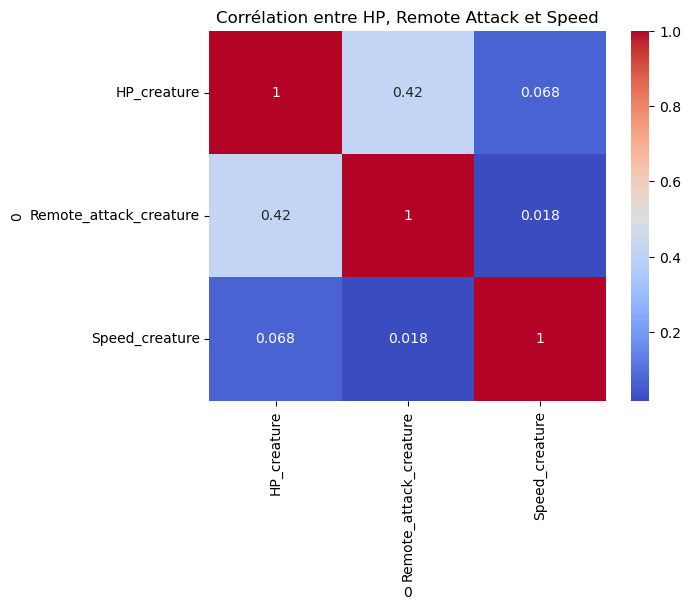

In [144]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre HP, Remote Attack et Speed')
plt.show()

In [145]:
#exporter un dataframe et l'enregistrer
df1.to_csv("cleaned_data/Cleaned_file01.csv", index=False)

# Le deuxième fichier

In [146]:
df2 = df2.iloc[1:].reset_index(drop=True)

In [147]:
pd.set_option('display.max_rows', None)

In [148]:
df2

,Chinese name,code name,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,ZukanIndexSuffix,...,Mining,OilExtraction (not shown in game),pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2,Passive skill 3,Passive skill 4
0,Zoe & Lightning Bear,GYM_ElecPanda,PAL_NAME_GrassBoss,GYM_NAME_Meadow,PARTNERSKILL_lecPanda,True,EPalTribeID::ElecPanda,GYM_ElecPanda,-2,NaN,...,0,0,0,0,3,0,NaN,NaN,NaN,NaN
1,Marcus & Horus,GYM_Horus,PAL_NAME_DessertBoss,GYM_NAME_Desert,PARTNERSKILL_orus,True,EPalTribeID::Horus,GYM_Horus,-2,NaN,...,0,0,0,0,3,0,NaN,NaN,NaN,NaN
2,Lily & Lily Queen,GYM_LilyQueen,PAL_NAME_ForestBoss,GYM_NAME_Forest,PARTNERSKILL_ilyQueen,True,EPalTribeID::LilyQueen,GYM_LilyQueen,-2,NaN,...,0,0,3,0,0,0,NaN,NaN,NaN,NaN
3,Axel & Pollux,GYM_ThunderDragonMan,PAL_NAME_VolcanoBoss,GYM_NAME_Volcano,PARTNERSKILL_hunderDragonMan,True,EPalTribeID::ThunderDragonMan,GYM_ThunderDragonMan,-2,NaN,...,0,0,0,0,3,0,NaN,NaN,NaN,NaN
4,does not appear in the game,BadCatgirl,NaN,NaN,NaN,True,EPalTribeID::BadCatgirl,BadCatgirl,-1,NaN,...,0,0,0,0,2,0,NaN,NaN,NaN,NaN
5,does not appear in the game,BlueberryFairy,NaN,NaN,NaN,True,EPalTribeID::BlueberryFairy,BlueberryFairy,-1,NaN,...,0,0,3,0,1,0,NaN,NaN,NaN,NaN
6,Melupa,BOSS_Alpaca,PAL_NAME_Alpaca,BOSS_NAME_Alpaca,PARTNERSKILL_Alpaca,True,EPalTribeID::Alpaca,BOSS_Alpaca,-1,NaN,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
7,Blue Flame Wolf,BOSS_AmaterasuWolf,PAL_NAME_AmaterasuWolf,BOSS_NAME_AmaterasuWolf,PARTNERSKILL_AmaterasuWolf,True,EPalTribeID::AmaterasuWolf,BOSS_AmaterasuWolf,-1,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,Anubis,Boss_Anubis,PAL_NAME_Anubis,BOSS_NAME_Anubis,PARTNERSKILL_Anubis,True,EPalTribeID::Anubis,Boss_Anubis,-1,NaN,...,3,0,0,0,2,0,ElementBoost_Earth_2_PAL,NaN,NaN,NaN
9,does not appear in the game,BOSS_BadCatgirl,PAL_NAME_BadCatgirl,BOSS_NAME_BadCatgirl,PARTNERSKILL_BadCatgirl,True,EPalTribeID::BadCatgirl,BOSS_BadCatgirl,-1,NaN,...,0,0,0,0,2,0,NaN,NaN,NaN,NaN


In [149]:
#supprimer les colonnes à 100%NaN
df2 = df2.dropna(axis=1, how='all')

In [150]:
df2.dtypes

Chinese name                         object
code name                            object
OverrideNameTextID                   object
NamePrefixID                         object
OverridePartnerSkillTextID           object
IsPal                                  bool
Tribe                                object
BPClass                              object
Pictorial ID                          int64
Size                                 object
rarity                                int64
Element 1                            object
Element 2                            object
GenusCategory                        object
Organization                         object
weapon                               object
WeaponEquip                            bool
HP                                    int64
melee attack                          int64
Remote attack                         int64
defense                               int64
support                               int64
CraftSpeed                      

In [151]:
df2[['Passive skill 1', 'Passive skill 2']]=df2[['Passive skill 1', 'Passive skill 2']].fillna('No skill')
df2[['Passive skill 1', 'Passive skill 2']] = df2[['Passive skill 1', 'Passive skill 2']].replace('No skill', 'No_skill')

C:\Users\amina\AppData\Local\Temp\ipykernel_1760\950186783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Passive skill 1', 'Passive skill 2']]=df2[['Passive skill 1', 'Passive skill 2']].fillna('No skill')
C:\Users\amina\AppData\Local\Temp\ipykernel_1760\950186783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Passive skill 1', 'Passive skill 2']] = df2[['Passive skill 1', 'Passive skill 2']].replace('No skill', 'No_skill')


In [152]:
df2['OverrideNameTextID']=df2['OverrideNameTextID'].fillna('No_PAL_NAME')
df2['NamePrefixID']=df2['NamePrefixID'].fillna('No_BOSS_NAME')
df2['OverridePartnerSkillTextID']=df2['OverridePartnerSkillTextID'].fillna('No_Partner_Skill')                                    

C:\Users\amina\AppData\Local\Temp\ipykernel_1760\2211690225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['OverrideNameTextID']=df2['OverrideNameTextID'].fillna('No_PAL_NAME')
C:\Users\amina\AppData\Local\Temp\ipykernel_1760\2211690225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NamePrefixID']=df2['NamePrefixID'].fillna('No_BOSS_NAME')
C:\Users\amina\AppData\Local\Temp\ipykernel_1760\2211690225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [153]:
df2.isnull().values.any()

True

In [154]:
df2.isnull().sum()[df2.isnull().sum()>0]

Element 2    145
dtype: int64

In [155]:
print(df2['Element 2'])

0              NaN
1              NaN
2              NaN
3      Electricity
4              NaN
5             Dark
6              NaN
7              NaN
8              NaN
9              NaN
10            Dark
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16            Dark
17            Dark
18             NaN
19          Dragon
20             NaN
21            Dark
22            Dark
23          Dragon
24             NaN
25             NaN
26             NaN
27             Ice
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
40           Earth
41             NaN
42             NaN
43             NaN
44             NaN
45             NaN
46             NaN
47             NaN
48             NaN
49             NaN
50           Water
51             NaN
52          

In [156]:
df2['Element 2']=df2['Element 2'].fillna('No_Secondary_Type')

C:\Users\amina\AppData\Local\Temp\ipykernel_1760\3294062354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Element 2']=df2['Element 2'].fillna('No_Secondary_Type')


In [157]:
df2

,Chinese name,code name,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,Size,...,collection,logging,Mining,OilExtraction (not shown in game),pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2
0,Zoe & Lightning Bear,GYM_ElecPanda,PAL_NAME_GrassBoss,GYM_NAME_Meadow,PARTNERSKILL_lecPanda,True,EPalTribeID::ElecPanda,GYM_ElecPanda,-2,XL,...,0,2,0,0,0,0,3,0,No_skill,No_skill
1,Marcus & Horus,GYM_Horus,PAL_NAME_DessertBoss,GYM_NAME_Desert,PARTNERSKILL_orus,True,EPalTribeID::Horus,GYM_Horus,-2,XL,...,0,0,0,0,0,0,3,0,No_skill,No_skill
2,Lily & Lily Queen,GYM_LilyQueen,PAL_NAME_ForestBoss,GYM_NAME_Forest,PARTNERSKILL_ilyQueen,True,EPalTribeID::LilyQueen,GYM_LilyQueen,-2,XL,...,2,0,0,0,3,0,0,0,No_skill,No_skill
3,Axel & Pollux,GYM_ThunderDragonMan,PAL_NAME_VolcanoBoss,GYM_NAME_Volcano,PARTNERSKILL_hunderDragonMan,True,EPalTribeID::ThunderDragonMan,GYM_ThunderDragonMan,-2,XL,...,0,0,0,0,0,0,3,0,No_skill,No_skill
4,does not appear in the game,BadCatgirl,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::BadCatgirl,BadCatgirl,-1,XL,...,3,1,0,0,0,0,2,0,No_skill,No_skill
5,does not appear in the game,BlueberryFairy,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::BlueberryFairy,BlueberryFairy,-1,XL,...,2,0,0,0,3,0,1,0,No_skill,No_skill
6,Melupa,BOSS_Alpaca,PAL_NAME_Alpaca,BOSS_NAME_Alpaca,PARTNERSKILL_Alpaca,True,EPalTribeID::Alpaca,BOSS_Alpaca,-1,XL,...,0,0,0,0,0,0,0,1,No_skill,No_skill
7,Blue Flame Wolf,BOSS_AmaterasuWolf,PAL_NAME_AmaterasuWolf,BOSS_NAME_AmaterasuWolf,PARTNERSKILL_AmaterasuWolf,True,EPalTribeID::AmaterasuWolf,BOSS_AmaterasuWolf,-1,XL,...,0,0,0,0,0,0,0,0,No_skill,No_skill
8,Anubis,Boss_Anubis,PAL_NAME_Anubis,BOSS_NAME_Anubis,PARTNERSKILL_Anubis,True,EPalTribeID::Anubis,Boss_Anubis,-1,XL,...,0,0,3,0,0,0,2,0,ElementBoost_Earth_2_PAL,No_skill
9,does not appear in the game,BOSS_BadCatgirl,PAL_NAME_BadCatgirl,BOSS_NAME_BadCatgirl,PARTNERSKILL_BadCatgirl,True,EPalTribeID::BadCatgirl,BOSS_BadCatgirl,-1,XL,...,3,1,0,0,0,0,2,0,No_skill,No_skill


In [158]:
#exporter un dataframe et l'enregistrer
df2.to_csv("cleaned_data/Cleaned_file02.csv", index=False)

# Le troisième fichier

In [159]:
df3e=data3.copy()

In [160]:
df3e.columns=df3e.iloc[0]

In [161]:
df3e.isnull().values.any()

True

In [162]:
df3e = df3e.dropna(axis=1, how='all')

In [163]:
df3e.isnull().sum()[df3e.isnull().sum()>0]

0
OverrideNameTextID            137
NamePrefixID                  138
OverridePartnerSkillTextID    137
variant                       105
Element 2                     112
nocturnal                     113
AISightResponse               138
Riding sprint speed            77
Must bring entry 1            121
Must bring entry 2            134
dtype: int64

In [164]:
df3e['OverrideNameTextID']=df3e['OverrideNameTextID'].fillna('No_PAL_NAME')
df3e['NamePrefixID']=df3e['NamePrefixID'].fillna('No_BOSS_NAME')
df3e['OverridePartnerSkillTextID']=df3e['OverridePartnerSkillTextID'].fillna('No_Partner_Skill')  
df3e['Element 2']=df3e['Element 2'].fillna('No_Secondary_Type')

In [5]:
#print(df3e['variant'])
#print(df3e['nocturnal'])
#print(df3e['AISightResponse'])
#print(df3e['Riding sprint speed'])
#print(df3e['Must bring entry 1'])
#print(df3e['Must bring entry 2'])

In [166]:
#df3e['variant']=df3e['variant'].fillna('no')
#df3e['nocturnal']=df3e['nocturnal'].fillna('no')
#df3e['Riding sprint speed']=df3e['Riding sprint speed'].fillna('cant_sprint')  
#df3e['Must bring entry 1']=df3e['Must bring entry 1'].fillna('unspecified')
#df3e['Must bring entry 2']=df3e['Must bring entry 2'].fillna('unspecified')

In [167]:
def analyze_dataframe(df, rare_threshold=0.01):
    for col in df.columns:
        print(f"\n{'='*30}\nAnalyse de la colonne : {col}\n{'='*30}")
        
        if df[col].dtype in ['int64', 'float64']:
            print("Type : Numérique")
            print(f"Résumé statistique :\n{df[col].describe()}")
            
            # Détection des outliers avec IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
            
            print(f"Nombre d'outliers détectés (méthode IQR) : {len(outliers)}")
        
        else:
            print("Type : Qualitatif (catégoriel ou texte)")
            
            # Nettoyage de base
            df[col] = df[col].astype(str).str.strip().str.lower()
            
            # Fréquence des valeurs
            counts = df[col].value_counts()
            freq = counts / len(df)
            
            print("Top 5 valeurs les plus fréquentes :")
            print(counts.head(5))
            
            # Détection des valeurs rares
            rare_values = freq[freq < rare_threshold]
            if not rare_values.empty:
                print(f"\nValeurs rares (< {rare_threshold*100:.0f}% des lignes) :")
                print(rare_values)
            else:
                print("Aucune valeur rare détectée.")
            
            print(f"Nombre de valeurs uniques : {df[col].nunique()}")

# Exemple d'utilisation
# analyze_dataframe(df)

In [1]:
#analyze_dataframe(df3e)

In [169]:
#analyze_dataframe(df2)

In [3]:
#df3e

In [171]:
#exporter un dataframe et l'enregistrer
df3e.to_csv("cleaned_data/Cleaned_file03.csv", index=False)

In [172]:
df4e=data4.copy()

In [173]:
df4e.columns=df4e.iloc[0]
df4e=df4e[1:].reset_index(drop=True)

In [174]:
df4e.isnull().values.any()

True

In [175]:
df4e = df4e.dropna(axis=1, how='all')

In [176]:
df4e.isnull().sum()[df4e.isnull().sum()>0]

0
night shift                                       113
Handling speed                                     82
ranch items                                       125
pasture minimum output                            125
The largest ranch (Rank = partner skill level)    125
dtype: int64

In [177]:
df4e['night shift']=df4e['night shift'].fillna('no')
df4e['ranch items']=df4e['ranch items'].fillna('no')
df4e['Handling speed']=df4e['Handling speed'].fillna('not_compatible')
df4e['pasture minimum output']=df4e['pasture minimum output'].fillna('not_comptible')
df4e['The largest ranch (Rank = partner skill level)']=df4e['The largest ranch (Rank = partner skill level)'].fillna('not_concerned')

In [178]:
analyze_dataframe(df4e)


Analyse de la colonne : ID
Type : Qualitatif (catégoriel ou texte)
Top 5 valeurs les plus fréquentes :
ID
31    2
71    2
81    2
37    2
84    2
Name: count, dtype: int64

Valeurs rares (< 1% des lignes) :
ID
67     0.007246
79     0.007246
78     0.007246
66     0.007246
72     0.007246
77     0.007246
73     0.007246
69     0.007246
76     0.007246
75     0.007246
70     0.007246
74     0.007246
68     0.007246
1      0.007246
82     0.007246
83     0.007246
109    0.007246
108    0.007246
107    0.007246
106    0.007246
105    0.007246
103    0.007246
100    0.007246
99     0.007246
98     0.007246
97     0.007246
96     0.007246
95     0.007246
94     0.007246
93     0.007246
92     0.007246
87     0.007246
62     0.007246
63     0.007246
56     0.007246
61     0.007246
28     0.007246
26     0.007246
25     0.007246
23     0.007246
22     0.007246
21     0.007246
20     0.007246
19     0.007246
18     0.007246
17     0.007246
16     0.007246
15     0.007246
14     0.007246
11   

In [179]:
df4e

,ID,English name,Chinese name,Volume size,Food intake,night shift,Total skills,Make a fire,watering,planting,...,logging,Mining,pharmaceutical,cool down,pasture,carry,Handling speed,ranch items,pasture minimum output,The largest ranch (Rank = partner skill level)
0,1,lamball,mian youyou,smallest,2,no,3,0,0,0,...,0,0,0,0,1,1,160,wool,1,rank
1,2,cattiva,naughty cat,smallest,2,no,4,0,0,0,...,0,1,0,0,0,1,160,no,not_comptible,not_concerned
2,3,chikipi,pipi chicken,smallest,1,no,2,0,0,0,...,0,0,0,0,1,0,not_compatible,egg,1,rank
3,4,lifmunk,green leaf rat,smallest,1,no,5,0,0,1,...,1,0,1,0,0,0,not_compatible,no,not_comptible,not_concerned
4,5,foxparks,tinder fox,smallest,2,no,1,1,0,0,...,0,0,0,0,0,0,not_compatible,no,not_comptible,not_concerned
5,6,fuack,surf duck,smallest,2,no,3,0,1,0,...,0,0,0,0,0,1,202,no,not_comptible,not_concerned
6,7,sparkit,volt meow,smallest,2,no,3,0,0,0,...,0,0,0,0,0,1,270,no,not_comptible,not_concerned
7,8,tanzee,neolepithecus,smallest,2,no,5,0,0,1,...,1,0,0,0,0,1,174,no,not_comptible,not_concerned
8,9,rooby,fire deer,small,3,no,1,1,0,0,...,0,0,0,0,0,0,not_compatible,no,not_comptible,not_concerned
9,10,pengullet,keimaru,smallest,2,no,4,0,1,0,...,0,0,0,1,0,1,265,no,not_comptible,not_concerned


In [180]:
#exporter un dataframe et l'enregistrer
df4e.to_csv("cleaned_data/Cleaned_file04.csv", index=False)

# Le cinqième fichier 

In [196]:
df5e=data5.copy()

In [220]:
df5e

,ID,name,minimum level,maximum level,ID,name,minimum level,fecundity,Pallu refresh type,Night only,refresh area,ID,name,maximum level,Pallu refresh type,Night only,refresh area
0,1,Mian Youyou,1,14,1,Mian Youyou,1,1470,Creeps,non,grassland,1,Mian Youyou,14,Creeps,non,grassland
1,2,Naughty cat,1,13,2,Naughty cat,1,1460,Creeps,non,grassland,2,Naughty cat,13,Random dungeon boss,non,dungeon
2,3,Pipi Chicken,1,13,3,Pipi Chicken,1,1500,Creeps,non,grassland,3,Pipi Chicken,13,Random dungeon boss,non,dungeon
3,4,green leaf rat,2,13,4,green leaf rat,2,1430,Creeps,non,islands,4,green leaf rat,13,Random dungeon boss,non,dungeon
4,5,tinder fox,2,18,5,tinder fox,2,1400,Creeps,non,islands,5,tinder fox,18,Wild BOSS,non,grassland
5,6,surf duck,2,13,6,surf duck,2,1330,Creeps,non,islands,6,surf duck,13,Random dungeon boss,non,dungeon
6,7,Volt Meow,3,17,7,Volt Meow,3,1410,Creeps,non,grassland,6,surf duck,13,Creeps,non,grassland
7,8,Neolepithecus,2,13,8,Neolepithecus,2,1250,Creeps,non,islands,7,Volt Meow,17,Creeps,non,grassland
8,9,Fire Deer,2,13,9,Fire Deer,2,1155,Creeps,non,islands,8,Neolepithecus,13,Random dungeon boss,non,dungeon
9,10,Keimaru,2,45,10,Keimaru,2,1350,Creeps,non,grassland,9,Fire Deer,13,Random dungeon boss,non,dungeon


In [206]:
df5e = df5e.iloc[1:].reset_index(drop=True)

In [202]:
df5e.columns=df5e.iloc[0]

In [208]:
#supprimer les colonnes à 100%NaN
df5e = df5e.dropna(axis=1, how='all')

In [214]:
df5e.isnull().values.any()

True

In [219]:
df5e=df5e[:-1]

In [221]:
df5e.isnull().sum()

0
ID                    0
name                  0
minimum level         0
maximum level         0
ID                    0
name                  0
minimum level         0
fecundity             0
Pallu refresh type    0
Night only            0
refresh area          0
ID                    0
name                  0
maximum level         0
Pallu refresh type    0
Night only            0
refresh area          0
dtype: int64

In [211]:
df5e['Night only']=df5e['Night only'].fillna("non")

In [222]:
#exporter un dataframe et l'enregistrer
df5e.to_csv("cleaned_data/Cleaned_file05.csv", index=False)

In [182]:
df6 = df6.transpose()

In [183]:
df6.columns = df6.iloc[0]

In [184]:
df6['HP'] = pd.to_numeric(df6['HP'], errors='coerce')  # convertit en float/int, remplace erreurs par NaN

In [185]:
df6

name,HP,melee attack,Remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,Ignore the bluntness,Ignore displacement,BiologicalGrade,endurance,fecundity
name,NaN,melee attack,Remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,Ignore the bluntness,Ignore displacement,BiologicalGrade,endurance,fecundity
Victor & Heterogeneous Griffin,8000.0,130,200,220,90,30,80,80,850,1100,465,TRUE,TRUE,9,100,9999
Heterogeneous Griffin,120.0,130,120,140,90,1,80,80,850,1200,465,FALSE,FALSE,5,250,60
Zoe & Lightning Bear,6000.0,100,100,100,100,30,80,140,470,650,287,TRUE,TRUE,9,100,9999
Lightning Bear,105.0,120,100,100,100,1,80,140,470,550,210,FALSE,FALSE,5,100,200
Marcus & Horus,6500.0,100,120,125,90,30,150,200,1000,1300,500,TRUE,TRUE,9,100,9999
Horus,100.0,100,105,110,90,1,150,200,1000,1400,500,FALSE,FALSE,5,230,370
Lily & Lily Queen,5500.0,100,110,105,100,30,60,100,450,650,275,TRUE,TRUE,9,100,9999
lily queen,110.0,100,110,105,100,1,60,100,450,550,275,FALSE,FALSE,5,100,250
Axel & Pollux,6500.0,100,140,110,100,30,100,185,900,1300,542,TRUE,TRUE,9,100,9999


In [186]:
def classify_boss(row):
    if (row['HP'] > 1000):
        return 'Boss de tour'
    else:
        return 'Boss normal'


In [187]:
df6["Type"] = df6.apply(classify_boss, axis=1)

In [188]:
df6

name,HP,melee attack,Remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,Ignore the bluntness,Ignore displacement,BiologicalGrade,endurance,fecundity,Type
name,NaN,melee attack,Remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,Ignore the bluntness,Ignore displacement,BiologicalGrade,endurance,fecundity,Boss normal
Victor & Heterogeneous Griffin,8000.0,130,200,220,90,30,80,80,850,1100,465,TRUE,TRUE,9,100,9999,Boss de tour
Heterogeneous Griffin,120.0,130,120,140,90,1,80,80,850,1200,465,FALSE,FALSE,5,250,60,Boss normal
Zoe & Lightning Bear,6000.0,100,100,100,100,30,80,140,470,650,287,TRUE,TRUE,9,100,9999,Boss de tour
Lightning Bear,105.0,120,100,100,100,1,80,140,470,550,210,FALSE,FALSE,5,100,200,Boss normal
Marcus & Horus,6500.0,100,120,125,90,30,150,200,1000,1300,500,TRUE,TRUE,9,100,9999,Boss de tour
Horus,100.0,100,105,110,90,1,150,200,1000,1400,500,FALSE,FALSE,5,230,370,Boss normal
Lily & Lily Queen,5500.0,100,110,105,100,30,60,100,450,650,275,TRUE,TRUE,9,100,9999,Boss de tour
lily queen,110.0,100,110,105,100,1,60,100,450,550,275,FALSE,FALSE,5,100,250,Boss normal
Axel & Pollux,6500.0,100,140,110,100,30,100,185,900,1300,542,TRUE,TRUE,9,100,9999,Boss de tour


In [189]:
#exporter un dataframe et l'enregistrer
df6.to_csv("cleaned_data/Cleaned_file06.csv", index=False)